# Power Plants

* **Data:** `powerplants.csv`
* **Columns of interest:**
    * `Plant_Name` is the name of the power plant
    * `Utility_Na` is the name of the owner of the power plant
    * `City`, `County`, `StateName`, `Zip`
    * `PrimSource` is what kind of energy source it uses (nuclear, coal, etc)
    * `Total_MW` is the total amount of energy produces

## Read in the data

In [1]:
import pandas as pd
pd.set_option('max_columns', None)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('powerplants.csv')

## What are the different types of energy sources in this dataset?

In [3]:
df.PrimSource.unique()

array(['hydroelectric', 'natural gas', 'coal', 'nuclear', 'petroleum',
       'pumped storage', 'geothermal', 'biomass', 'wind', 'other',
       'solar'], dtype=object)

## What is the most common type of power plant in the United States?

In [4]:
df.PrimSource.value_counts()

solar             2255
natural gas       1701
hydroelectric     1410
wind              1043
petroleum          842
biomass            726
coal               337
other              140
geothermal          66
nuclear             61
pumped storage      35
Name: PrimSource, dtype: int64

## Make a graph of it, with the longest bar on the top.

<AxesSubplot:>

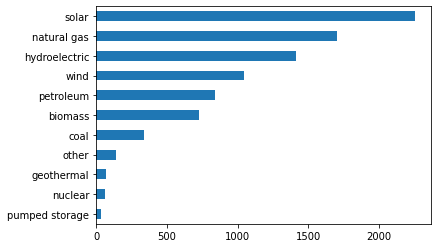

In [5]:
df.PrimSource.value_counts().sort_values(ascending=True).plot(kind='barh')

## What type of power plant produces the most energy in the United States?

In [6]:
# I defined 'most' as in the largest total
df.groupby('PrimSource').Total_MW.sum().sort_values(ascending=False)

PrimSource
natural gas       453886.8
coal              257599.1
nuclear           100883.2
wind               88450.1
hydroelectric      79906.2
petroleum          30739.2
solar              27384.1
pumped storage     22864.5
biomass            14085.3
other               3882.5
geothermal          2541.0
Name: Total_MW, dtype: float64

## Make a graph of it, with the longest bar on the top.

<AxesSubplot:ylabel='PrimSource'>

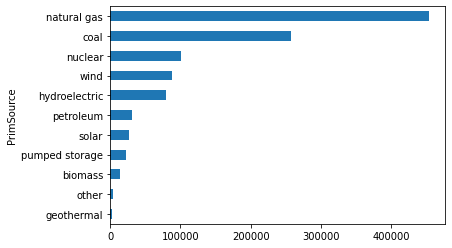

In [7]:
df.groupby('PrimSource').Total_MW.sum().sort_values(ascending=True).plot(kind='barh')

## What US state has the most power plants?

In [8]:
df.StateName.value_counts().head(1)

California    1344
Name: StateName, dtype: int64

## What three US states produce the most energy?

In [9]:
df.groupby('StateName').Total_MW.sum().sort_values(ascending=False).head(3)

StateName
Texas         120730.5
California     76724.7
Florida        57987.4
Name: Total_MW, dtype: float64

## What state has the most coal power plants?

In [10]:
# printed out top 3 because there's a tie
df[df.PrimSource == 'coal'].StateName.value_counts().head(3)

Illinois        21
Pennsylvania    21
Texas           18
Name: StateName, dtype: int64

## What state produces the most energy using solar power?

In [11]:
df[df.PrimSource == 'solar'].groupby('StateName').Total_MW.sum().sort_values(ascending=False).head(1)

StateName
California    10953.9
Name: Total_MW, dtype: float64

## List all of the nuclear powerplants in New York.

In [12]:
df[(df.PrimSource == 'nuclear') & (df.StateName == 'New York')].Plant_Name

1155                     Indian Point 2
1213    Nine Mile Point Nuclear Station
1861                James A Fitzpatrick
1868      R E Ginna Nuclear Power Plant
2536                     Indian Point 3
Name: Plant_Name, dtype: object

## What is the most common type of powerplant in New Jersey?

In [13]:
df[df.StateName == 'New Jersey'].PrimSource.value_counts()

solar             183
natural gas        48
biomass            16
petroleum           4
nuclear             3
coal                2
hydroelectric       2
other               2
wind                2
pumped storage      1
Name: PrimSource, dtype: int64

## What type of power plant produces the most power in New Jersey?

In [14]:
df[df.StateName == 'New Jersey'].groupby('PrimSource').Total_MW.sum().sort_values(ascending=False)

PrimSource
natural gas       11556.3
nuclear            4146.3
solar               638.5
coal                463.0
pumped storage      420.0
petroleum           334.0
biomass             226.4
other                13.1
hydroelectric        12.3
wind                  7.6
Name: Total_MW, dtype: float64